# 電腦視覺基本概念

## 學習目標
- 理解電腦視覺的定義與應用
- 掌握數位影像的基本表示方法
- 了解像素、色彩空間與座標系統
- 認識常見的影像處理操作

In [5]:
import sys
import os

# Add the project root to the Python path to enable module imports
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils.image_utils import load_image, resize_image
from utils.visualization import display_image, display_multiple_images

print(f'✅ OpenCV version: {cv2.__version__}')
print(f'✅ NumPy version: {np.__version__}')

✅ OpenCV version: 4.12.0
✅ NumPy version: 2.2.6


## 1. 什麼是電腦視覺？

**電腦視覺 (Computer Vision)** 是一個跨學科領域，致力於讓電腦能夠理解和分析視覺資訊。

### 電腦視覺的三個層次

```
低階視覺 (Low-level Vision)
    ↓
    影像處理、邊緣檢測、特徵提取
    
中階視覺 (Mid-level Vision)  
    ↓
    物體辨識、分割、追蹤
    
高階視覺 (High-level Vision)
    ↓
    場景理解、行為分析、決策
```

### 電腦視覺 vs 影像處理

| 項目 | 影像處理 (Image Processing) | 電腦視覺 (Computer Vision) |
|------|----------------------------|---------------------------|
| **目標** | 改善影像品質 | 理解影像內容 |
| **輸入** | 影像 | 影像 |
| **輸出** | 影像 | 資訊/決策 |
| **範例** | 濾波、增強、壓縮 | 物體辨識、姿態估計 |

## 2. 數位影像表示

### 2.1 什麼是數位影像？

數位影像是由**像素 (Pixels)** 組成的二維矩陣。

- **像素**: 影像的最小單位
- **解析度**: 影像的寬度 × 高度（以像素為單位）
- **位元深度**: 每個像素可以表示的顏色數量

```
影像 = 矩陣 (Height × Width × Channels)
```

影像形狀: (5, 5)
資料型別: uint8
最小值: 0, 最大值: 255

影像矩陣:
[[  0  50 100 150 200]
 [ 50 100 150 200 250]
 [100 150 200 250 255]
 [150 200 250 255 255]
 [200 250 255 255 255]]


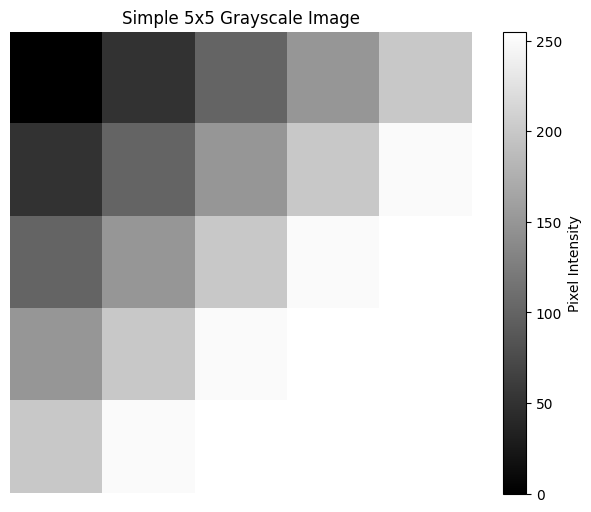

In [6]:
# 創建一個簡單的灰階影像
simple_img = np.array([
    [0, 50, 100, 150, 200],
    [50, 100, 150, 200, 250],
    [100, 150, 200, 250, 255],
    [150, 200, 250, 255, 255],
    [200, 250, 255, 255, 255]
], dtype=np.uint8)

print(f'影像形狀: {simple_img.shape}')
print(f'資料型別: {simple_img.dtype}')
print(f'最小值: {simple_img.min()}, 最大值: {simple_img.max()}')
print(f'\n影像矩陣:\n{simple_img}')

# 顯示影像
plt.figure(figsize=(8, 6))
plt.imshow(simple_img, cmap='gray')
plt.colorbar(label='Pixel Intensity')
plt.title('Simple 5x5 Grayscale Image')
plt.axis('off')
plt.show()

### 2.2 像素值範圍

常見的像素值範圍：

- **8-bit**: 0-255（最常見，256個灰階）
- **16-bit**: 0-65535
- **浮點數**: 0.0-1.0（歸一化）

```python
uint8:   [0, 255]      # 256個值
float32: [0.0, 1.0]    # 連續值
```

In [7]:
# 不同資料型別的影像
img_uint8 = np.array([[0, 127, 255]], dtype=np.uint8)
img_float = np.array([[0.0, 0.5, 1.0]], dtype=np.float32)

print(f'uint8 影像: {img_uint8}')
print(f'float32 影像: {img_float}')

# 轉換
converted = img_uint8.astype(np.float32) / 255.0
print(f'\n轉換後: {converted}')

uint8 影像: [[  0 127 255]]
float32 影像: [[0.  0.5 1. ]]

轉換後: [[0.         0.49803922 1.        ]]


## 3. 色彩空間 (Color Spaces)

### 3.1 常見色彩空間

#### RGB / BGR
- **RGB**: Red, Green, Blue（最直觀）
- **BGR**: Blue, Green, Red（OpenCV 預設）
- 每個通道: 0-255

#### HSV
- **H**: Hue（色相）0-179
- **S**: Saturation（飽和度）0-255
- **V**: Value（明度）0-255
- 更符合人類視覺感知

#### Grayscale
- 單通道：0-255
- 只有亮度資訊

### 色彩空間對照表

| 色彩 | RGB | HSV | 用途 |
|------|-----|-----|------|
| 紅色 | (255,0,0) | (0,255,255) | 色彩檢測 |
| 綠色 | (0,255,0) | (60,255,255) | 影像分割 |
| 藍色 | (0,0,255) | (120,255,255) | 物體追蹤 |
| 白色 | (255,255,255) | (0,0,255) | 背景移除 |
| 黑色 | (0,0,0) | (0,0,0) | 遮罩處理 |

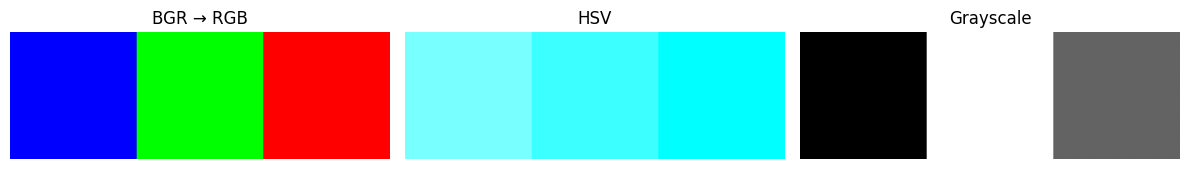

BGR shape: (100, 300, 3)
HSV shape: (100, 300, 3)
Gray shape: (100, 300)


In [8]:
# 創建彩色影像（BGR格式）
color_img = np.zeros((100, 300, 3), dtype=np.uint8)

# 藍色區塊
color_img[:, 0:100] = [255, 0, 0]  # BGR: Blue

# 綠色區塊  
color_img[:, 100:200] = [0, 255, 0]  # BGR: Green

# 紅色區塊
color_img[:, 200:300] = [0, 0, 255]  # BGR: Red

# 顯示
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
plt.title('BGR → RGB')
plt.axis('off')

# 轉換為 HSV
hsv_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)
plt.subplot(132)
plt.imshow(hsv_img)
plt.title('HSV')
plt.axis('off')

# 轉換為灰階
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
plt.subplot(133)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f'BGR shape: {color_img.shape}')
print(f'HSV shape: {hsv_img.shape}')
print(f'Gray shape: {gray_img.shape}')

## 4. 座標系統

### OpenCV 座標系統

```
(0,0) ────────────► X軸 (寬度/列)
  │
  │
  │
  ▼
 Y軸
(高度/行)
```

**重要**: 
- 原點在**左上角**
- `image[y, x]` 或 `image[row, col]`
- `shape = (height, width, channels)`

### NumPy vs OpenCV

```python
# NumPy 索引
img[row, col]      # 或 img[y, x]
img[y1:y2, x1:x2]  # 切片

# OpenCV 函數
cv2.rectangle(img, (x1, y1), (x2, y2), color)  # (x, y) 順序
cv2.circle(img, (x, y), radius, color)         # (x, y) 順序
```

/home/sunny/python_workstation/github/OpenCV-tools-image-process/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24231 (\N{CJK UNIFIED IDEOGRAPH-5EA7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sunny/python_workstation/github/OpenCV-tools-image-process/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sunny/python_workstation/github/OpenCV-tools-image-process/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sunny/python_workstation/github/OpenCV-tools-image-process/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32113 (\N{CJK UNIFIED IDEOGRAPH-7D71}) missing from

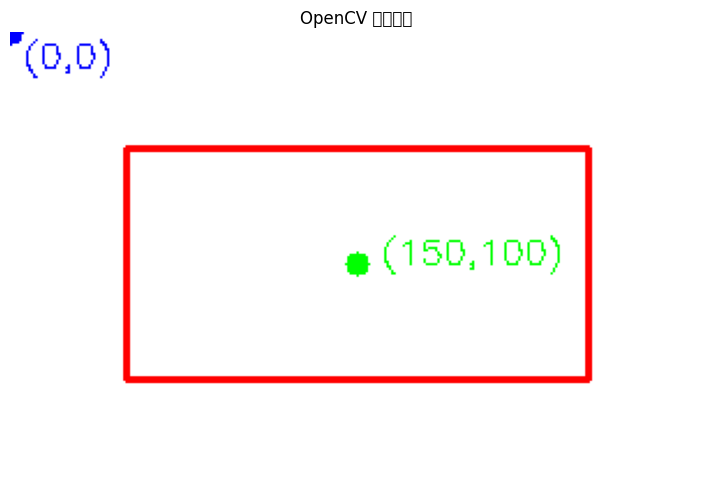

影像尺寸: (200, 300, 3)
Height (rows): 200
Width (cols): 300


In [9]:
# 座標系統示範
demo_img = np.ones((200, 300, 3), dtype=np.uint8) * 255

# 標記原點
cv2.circle(demo_img, (0, 0), 5, (255, 0, 0), -1)  # 藍色點
cv2.putText(demo_img, '(0,0)', (5, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# 標記中心點
center_x, center_y = 150, 100
cv2.circle(demo_img, (center_x, center_y), 5, (0, 255, 0), -1)  # 綠色點
cv2.putText(demo_img, f'({center_x},{center_y})', (center_x+10, center_y), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# 繪製矩形
cv2.rectangle(demo_img, (50, 50), (250, 150), (0, 0, 255), 2)  # 紅色矩形

# 顯示
display_image(demo_img, title='OpenCV 座標系統', figsize=(10, 6))

print(f'影像尺寸: {demo_img.shape}')
print(f'Height (rows): {demo_img.shape[0]}')
print(f'Width (cols): {demo_img.shape[1]}')

## 5. 基本影像操作

### 5.1 像素存取

In [10]:
# 創建測試影像
test_img = np.random.randint(0, 256, (5, 5, 3), dtype=np.uint8)

print(f'原始影像:\n{test_img[:, :, 0]}  # B通道\n')

# 讀取單一像素
pixel = test_img[2, 3]  # row=2, col=3
print(f'像素[2,3] (BGR): {pixel}')

# 修改單一像素
test_img[2, 3] = [255, 0, 0]  # 設為藍色
print(f'修改後[2,3]: {test_img[2, 3]}')

# 區域存取
region = test_img[1:4, 1:4]  # 3x3 區域
print(f'\n3x3 區域形狀: {region.shape}')

原始影像:
[[ 28 209  31 191  27]
 [183 225  21 207  79]
 [172 182 214 176 187]
 [149  17 149 140 175]
 [ 82  39  97 193  86]]  # B通道

像素[2,3] (BGR): [176 181 119]
修改後[2,3]: [255   0   0]

3x3 區域形狀: (3, 3, 3)


### 5.2 通道分離與合併

B通道形狀: (100, 100)
G通道形狀: (100, 100)
R通道形狀: (100, 100)


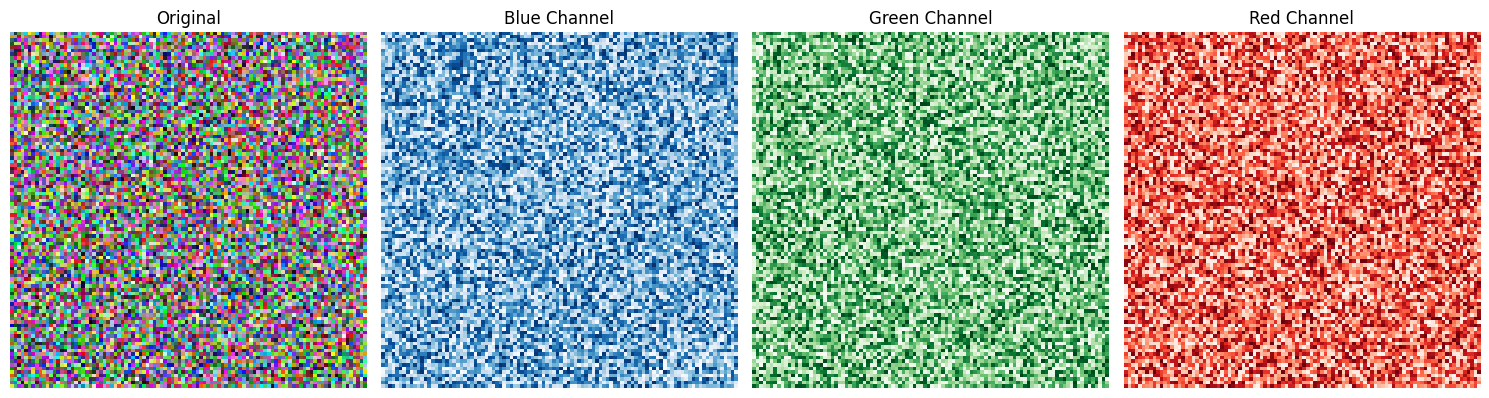


合併後形狀: (100, 100, 3)
是否相同: True


In [11]:
# 創建彩色影像
bgr_img = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)

# 分離通道
b, g, r = cv2.split(bgr_img)

print(f'B通道形狀: {b.shape}')
print(f'G通道形狀: {g.shape}')
print(f'R通道形狀: {r.shape}')

# 顯示各通道
plt.figure(figsize=(15, 4))

plt.subplot(141)
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(142)
plt.imshow(b, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.subplot(143)
plt.imshow(g, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(144)
plt.imshow(r, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

# 合併通道
merged = cv2.merge([b, g, r])
print(f'\n合併後形狀: {merged.shape}')
print(f'是否相同: {np.array_equal(bgr_img, merged)}')

## 6. 常見影像處理操作

### 影像處理流程

```
原始影像
   ↓
前處理 (去噪、增強)
   ↓
特徵提取 (邊緣、角點)
   ↓
分析/辨識
   ↓
結果
```

### 基本操作分類

| 類別 | 操作 | 用途 |
|------|------|------|
| **點運算** | 閾值化、對比度調整 | 改善影像品質 |
| **局部運算** | 濾波、卷積 | 去噪、平滑 |
| **幾何變換** | 旋轉、縮放、裁切 | 影像對齊 |
| **形態學** | 侵蝕、膨脹 | 形狀分析 |
| **特徵檢測** | 邊緣、角點 | 物體識別 |

## 7. 實作練習

### 練習 1: 創建漸層影像

/home/sunny/python_workstation/github/OpenCV-tools-image-process/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sunny/python_workstation/github/OpenCV-tools-image-process/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sunny/python_workstation/github/OpenCV-tools-image-process/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28472 (\N{CJK UNIFIED IDEOGRAPH-6F38}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sunny/python_workstation/github/OpenCV-tools-image-process/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23652 (\N{CJK UNIFIED IDEOGRAPH-5C64}) missing from

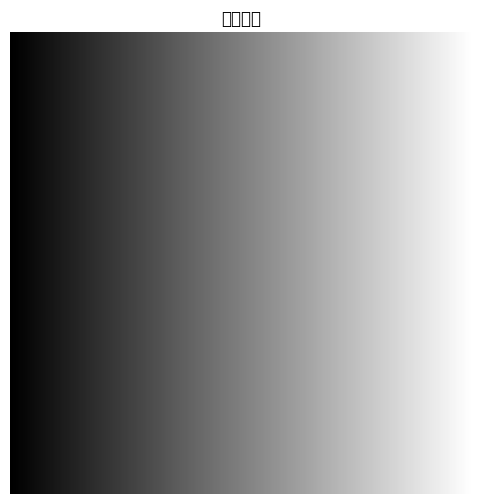

In [12]:
# TODO: 創建一個 200x200 的水平漸層影像（左邊黑、右邊白）
gradient = np.zeros((200, 200), dtype=np.uint8)

for x in range(200):
    gradient[:, x] = int(x / 200 * 255)

display_image(gradient, title='水平漸層', cmap='gray', figsize=(6, 6))

### 練習 2: 通道交換

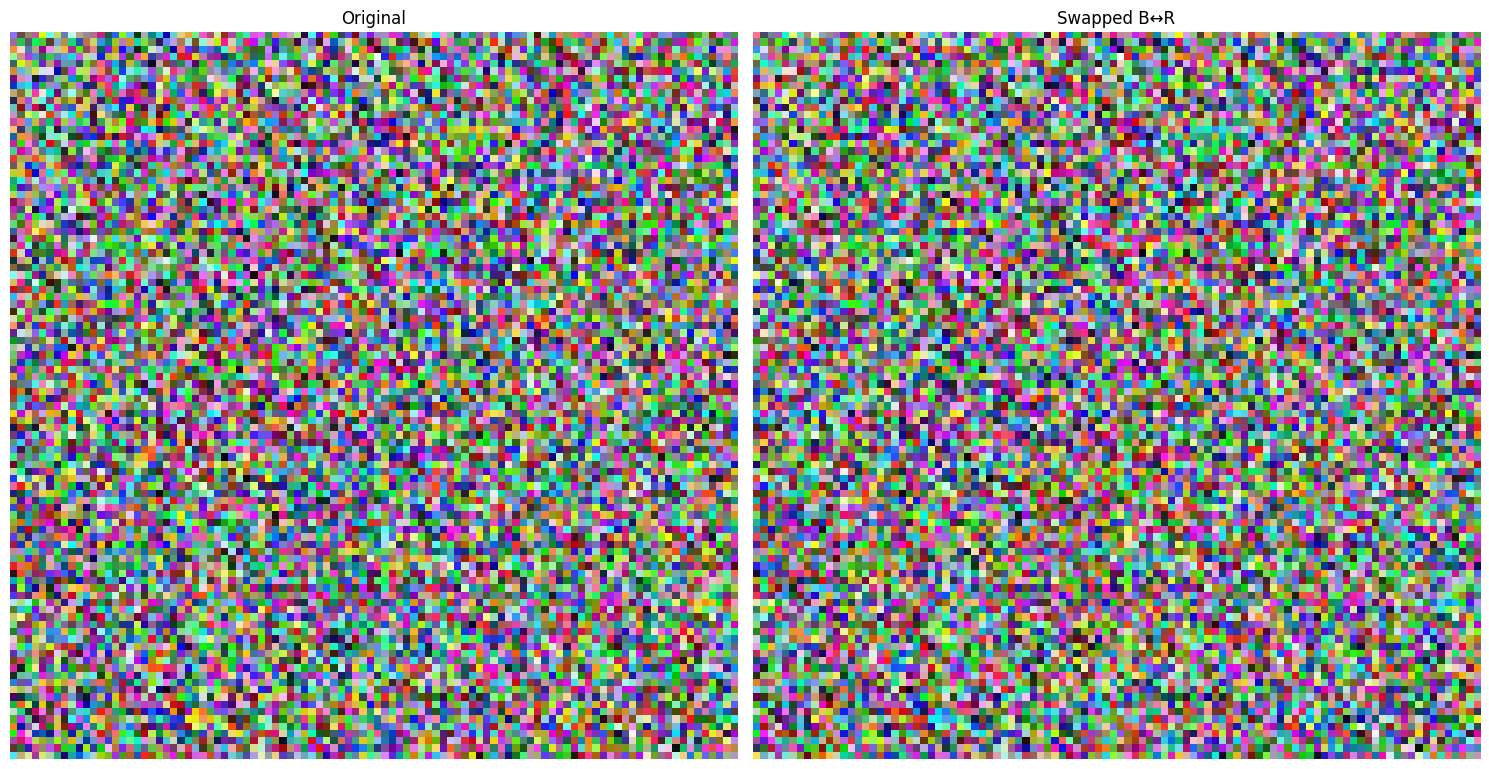

In [13]:
# TODO: 將 BGR 影像的藍色和紅色通道交換
img = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)
b, g, r = cv2.split(img)

# 交換 B 和 R
swapped = cv2.merge([r, g, b])  # RBG

display_multiple_images(
    [cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cv2.cvtColor(swapped, cv2.COLOR_BGR2RGB)],
    ['Original', 'Swapped B↔R'],
    rows=1, cols=2
)

## 8. 總結

### 重點回顧

1. **數位影像** = 像素矩陣 (Height × Width × Channels)
2. **色彩空間**: BGR (OpenCV預設), RGB, HSV, Grayscale
3. **座標系統**: 原點在左上角，(x, y) = (col, row)
4. **像素值**: uint8 [0-255], float [0.0-1.0]
5. **基本操作**: 讀取、修改、分離、合併通道

### 下一步學習

- [x] 電腦視覺概念 ← **你在這裡**
- [ ] 圖像 I/O 與顯示
- [ ] 幾何變換
- [ ] 色彩空間轉換
- [ ] 濾波與平滑

### 參考資源

- OpenCV 官方教程: https://docs.opencv.org/4.x/
- 本專案 utils 模組: `utils/image_utils.py`
- 測試範例: `tests/test_image_utils.py`